<a href="https://colab.research.google.com/github/Athukoralack/Machinelearning_qus01/blob/main/cohndds_231f_016(codes)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# importing data set

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine Learning/Assignment 02/bank-full.csv")

In [ ]:
data.shape

(45211, 17)

# Checking null values

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

# Checking unique values

In [ ]:
for columns in data.columns:
  print(columns)
  print("-"*50)
  print(data[columns].value_counts())
  print("-"*50) 

age
--------------------------------------------------
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64
--------------------------------------------------
job
--------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
--------------------------------------------------
marital
--------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
--------------------------------------------------
education
--------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: educatio

# Drop unwanted columns

In [ ]:
data.drop(columns=['day', 'month'], inplace=True)

In [ ]:
Data = data.dropna(how='any' , axis=0)

In [ ]:
Data.describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


# Handling Outliers

<Axes: >

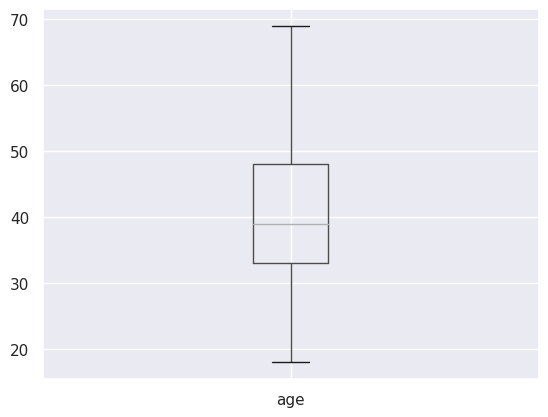

In [ ]:
#'Age'
Data = Data[(Data['age'] < 70)]
Data.boxplot(column='age')

<Axes: >

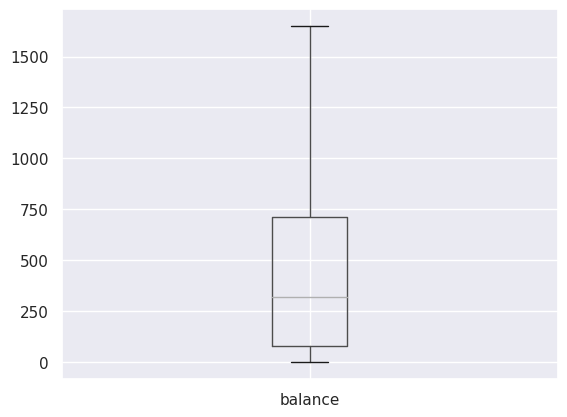

In [ ]:
# 'balance'
Data = Data[(Data['balance'] >= 0) & (Data['balance'] <= 1650)]
Data.boxplot(column='balance')

<Axes: >

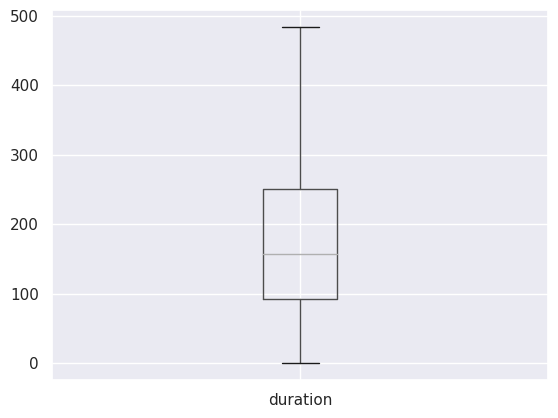

In [ ]:
# 'duration'
Data = Data[(Data['duration'] < 485)]
Data.boxplot(column='duration')

<Axes: >

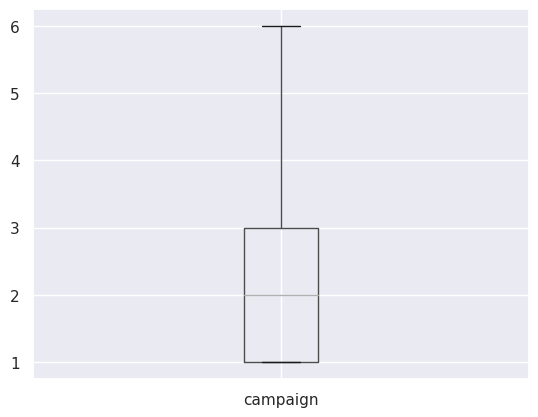

In [ ]:
#'campaign'
Data = Data[(Data['campaign'] <= 6)]
Data.boxplot(column='campaign')

<Axes: >

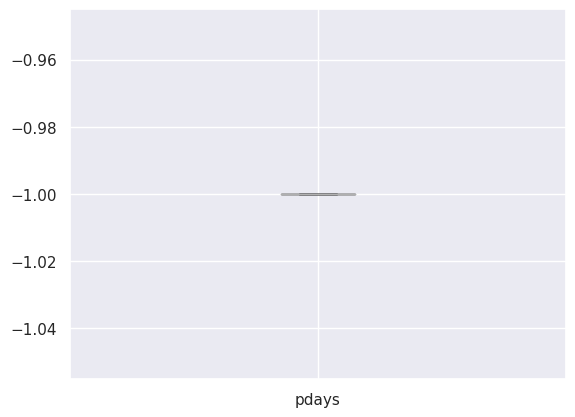

In [ ]:
# 'pdays'
Data = Data[(Data['pdays'] <= 0)]
Data.boxplot(column='pdays')

<Axes: >

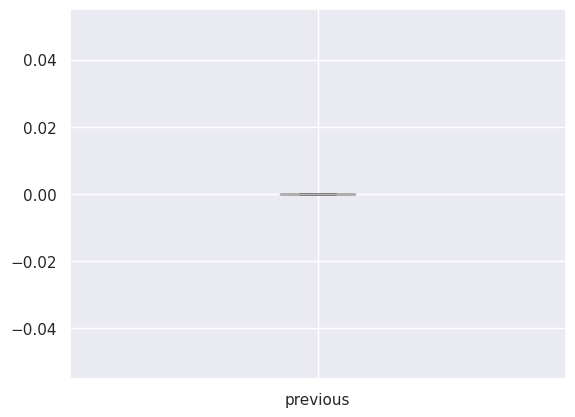

In [ ]:
# 'previous'
Data = Data[(Data['previous'] < 10)]
Data.boxplot(column='previous')

# correlation test

In [ ]:
correlation = Data.corr()
correlation

<ipython-input-21-9ff738db1e63>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Data.corr()


,age,balance,duration,campaign,pdays,previous
age,1.000000,0.046289,-0.049997,0.047572,NaN,NaN
balance,0.046289,1.000000,0.020480,-0.010397,NaN,NaN
duration,-0.049997,0.020480,1.000000,-0.077578,NaN,NaN
campaign,0.047572,-0.010397,-0.077578,1.000000,NaN,NaN
pdays,NaN,NaN,NaN,NaN,NaN,NaN
previous,NaN,NaN,NaN,NaN,NaN,NaN


<ipython-input-22-85280b1c1a14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Data.corr()


<Axes: >

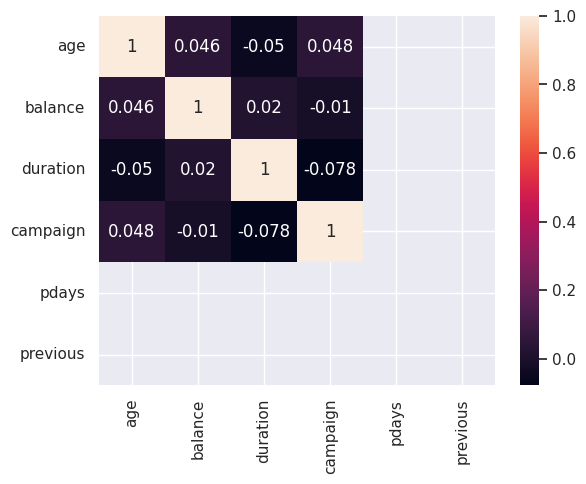

In [ ]:
correlation = Data.corr()
sb.heatmap(correlation, xticklabels=correlation.columns, yticklabels= correlation.columns, annot=True)

# Dropping

In [ ]:
#Dropping unwanted columns
Data.drop(columns=['pdays', 'previous'], inplace=True)

In [ ]:
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,poutcome,Target
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,139,1,unknown,no


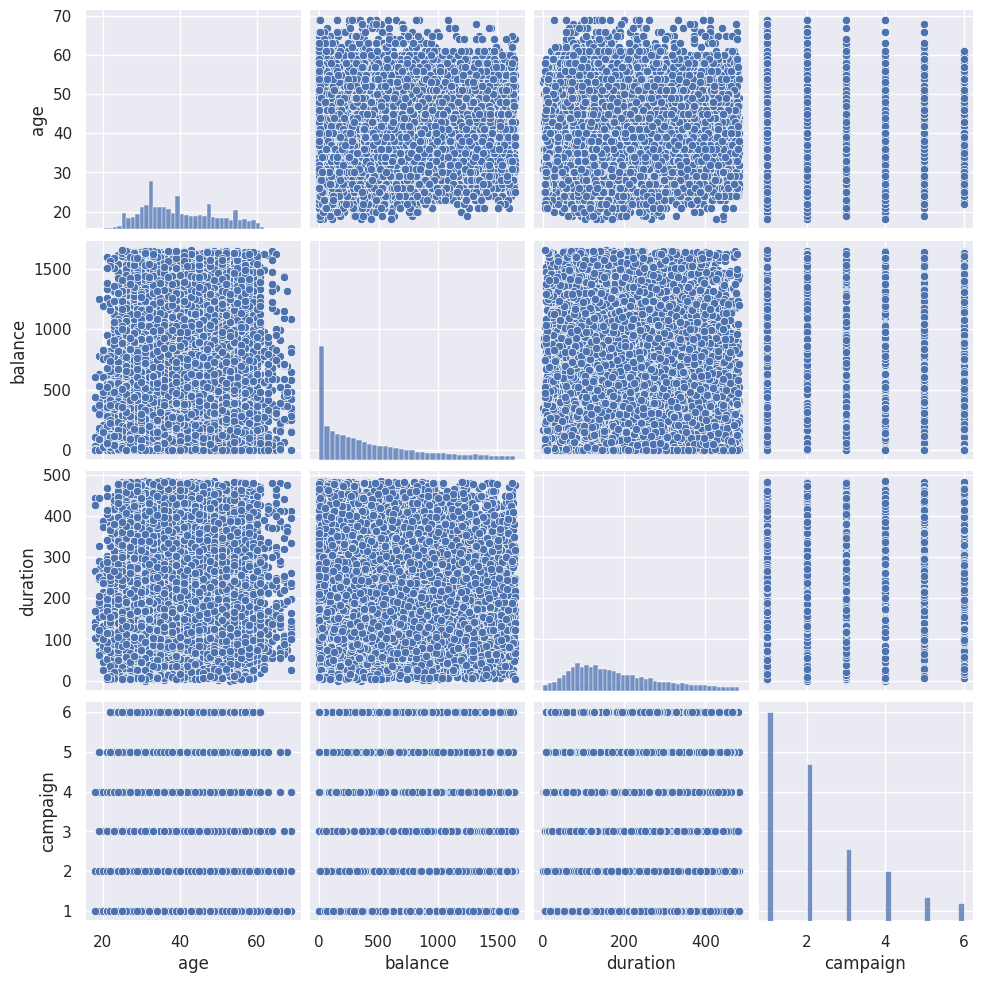

In [ ]:
sb.pairplot(Data)

# Correlation check

<ipython-input-26-85280b1c1a14>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = Data.corr()


<Axes: >

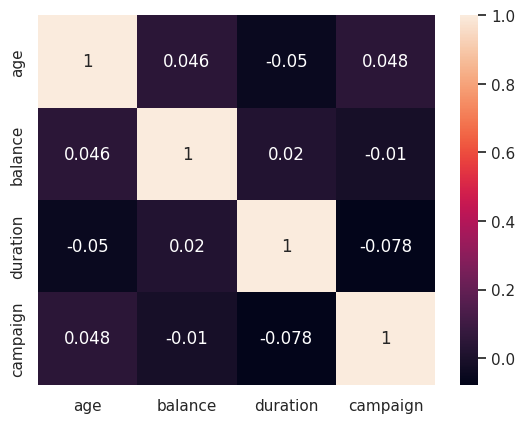

In [ ]:
correlation = Data.corr()
sb.heatmap(correlation, xticklabels=correlation.columns, yticklabels= correlation.columns, annot=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# onehotencoder

In [ ]:
#Making an object
o = OneHotEncoder
print(o)

<class 'sklearn.preprocessing._encoders.OneHotEncoder'>


In [ ]:
# Select the categorical variables for one-hot encoding
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'campaign', 'poutcome']

# Extract the categorical variables from the dataset
data_categorical = data[categorical_vars]

# Initialize the OneHotEncoder object
o = OneHotEncoder()

# Fit and transform the categorical data
data_encoded = o.fit_transform(data_categorical)

# Convert the encoded data to an array
data_encoded_array = data_encoded.toarray()

# Create a new DataFrame with the encoded data
data_encoded_df = pd.DataFrame(data_encoded_array, columns=ohe.get_feature_names_out(categorical_vars))

# Concatenate the encoded categorical data with the remaining columns of the original dataset
data_f = pd.concat([data_encoded_df, data.drop(columns=categorical_vars)], axis=1)


In [ ]:
data_f.head() 

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,age,balance,duration,pdays,previous,Target
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,58,2143,261,-1,0,no
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,44,29,151,-1,0,no
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,33,2,76,-1,0,no
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,47,1506,92,-1,0,no
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,33,1,198,-1,0,no


In [ ]:
df = data_f.dropna(how='any', axis=0)
columns_to_drop = ['job_unknown', 'education_unknown','contact_unknown','poutcome_unknown']
df = df.drop(columns=columns_to_drop)

# New csv file

In [ ]:
#Saving the new csv file
data_f.to_csv('bankdataN.csv')

In [ ]:
#Independant features
x = df.drop(columns = ['Target']) 
#Feature which we are predicting through the model
y = df['Target']#Dependant features

# split and train

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)


In [ ]:
x_train_len = len(x_train)
x_test_len = len(x_test)
y_train_len = len(y_train)
y_test_len = len(y_test)

print('Length of x train - ', x_train_len)
print('Length of x test - ', x_test_len)
print('Length of y train - ' , y_train_len)
print('Length of y test - ' , y_test_len )

Length of x train -  36168
Length of x test -  9043
Length of y train -  36168
Length of y test -  9043


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# check accuracy

In [ ]:
#accurCY
model.score(x_test,y_test)

0.8907442220502045

In [ ]:
#lasso logistic regression
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
#model accuracy
model.score(x_test,y_test)

0.8971580227800509